In [1]:
# Data manipulation
import pandas as pd  # for data cleaning and operations
import numpy as np   # for numerical operations and array handling

# Data visualization
import matplotlib.pyplot as plt  # for basic plotting
import seaborn as sns  # for enhanced visualizations

# Machine learning and text processing
from sklearn.feature_extraction.text import TfidfVectorizer  # for text vectorization
from sklearn.metrics.pairwise import cosine_similarity  # for similarity calculations

# Additional utilities
import os  # for operating system interactions
from scipy.sparse import coo_matrix  # for sparse matrix operations

C:\Users\Ayaz Ahmed\AppData\Local\Temp\ipykernel_15696\2270946875.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # for data cleaning and operations


In [2]:
#Data Loading and preprocessing 
train_data=pd.read_csv('marketing_sample_for_walmart_5k_data.tsv',sep='\t')
print("=====================================================================================================================================================================================================================================================================================================================================")
sample=train_data.columns
print(sample)
print("=====================================================================================================================================================================================================================================================================================================================================")

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')


In [3]:
# Basic Operations
# train_data['Product Tags'] # shows specific column data
# train_data.shape #used to show total data of datasheet
train_data.isnull().sum() #used to show columns with null values
# train_data['Product Rating'].fillna(0,inplace=true)
train_data.duplicated().sum() # used to check all duplictes data in file

0

In [4]:
train_data['Product Rating'].fillna(0,inplace=True)  #used to fill the nan values 
train_data["Product Reviews Count"].fillna(0,inplace=True)  #used to fill the nan values 
train_data['Product Category'].fillna('',inplace=True)  #used to fill the nan values 
train_data['Product Brand'].fillna('',inplace=True)  #used to fill the nan values 
train_data['Product Description'].fillna('',inplace=True)  #used to fill the nan values 

C:\Users\Ayaz Ahmed\AppData\Local\Temp\ipykernel_15696\102876092.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Rating'].fillna(0,inplace=True)  #used to fill the nan values
C:\Users\Ayaz Ahmed\AppData\Local\Temp\ipykernel_15696\102876092.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [5]:
#for shorter name
column_name_mapping = {   #is called dictionary
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}
train_data.rename(columns=column_name_mapping, inplace=True)

In [6]:
train_data['ID']=train_data['ID'].str.extract(r'(\d+)').astype(float)
train_data['ProdID']=train_data['ProdID'].str.extract(r'(\d+)').astype(float)


In [7]:
# EDA (Exploratory Data Analysis)

num_users = train_data['ID'].nunique()
num_items = train_data['ProdID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Number Of Unique Users", {num_users})
print(f"Number Of Unique Items", {num_items})
print(f"Number Of Unique Rating", {num_ratings})






Number Of Unique Users {1721}
Number Of Unique Items {1697}
Number Of Unique Rating {36}


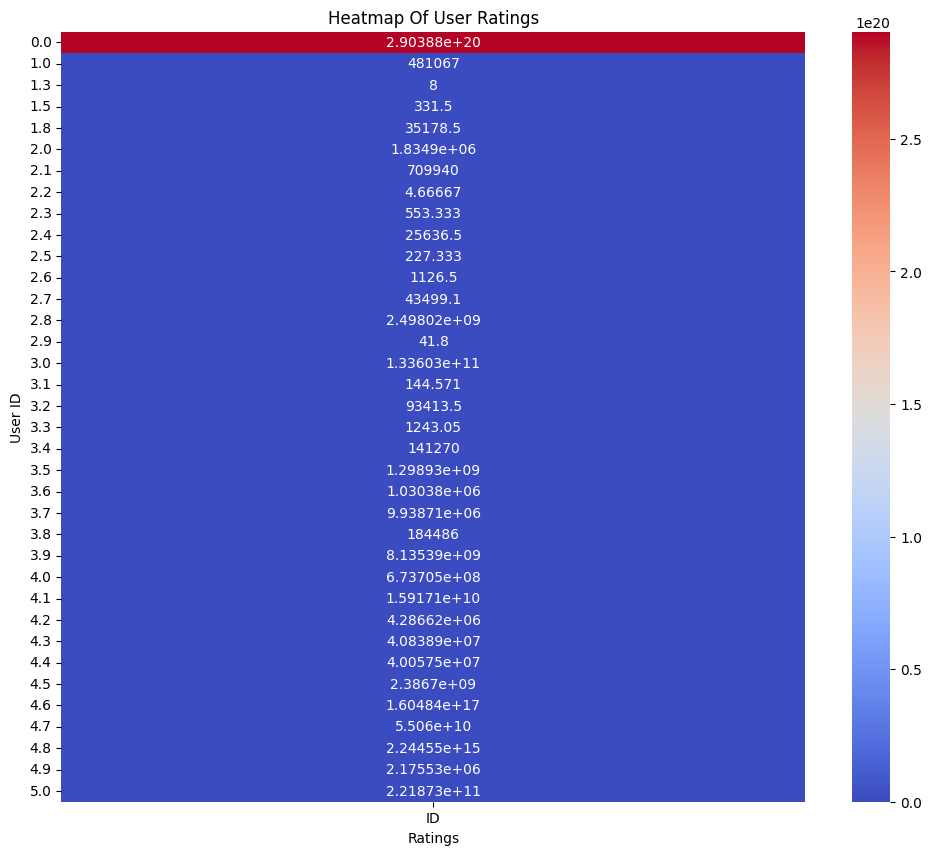

In [8]:
# Pivot the dataframe to create heatmap
heatmap_data = train_data.pivot_table('ID',"Rating")
# Creating heatmap
plt.figure(figsize=(12,10))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap Of User Ratings')
plt.xlabel('Ratings')
plt.ylabel('User ID')
plt.show()



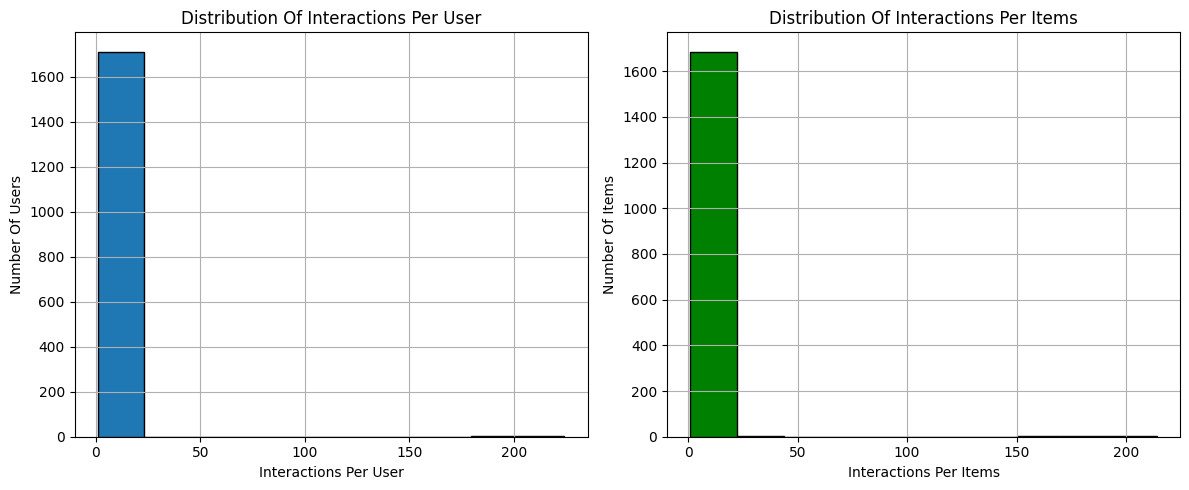

In [9]:
# Distribution Of Interaction
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel("Interactions Per User")
plt.ylabel("Number Of Users")
plt.title("Distribution Of Interactions Per User")

plt.subplot(1,2,2)
train_data['ProdID'].value_counts().hist(bins=10, edgecolor='k', color='green')
plt.xlabel("Interactions Per Items")
plt.ylabel("Number Of Items")
plt.title("Distribution Of Interactions Per Items")

plt.tight_layout()
plt.show()




Text(0.5, 1.0, 'Most Popular Items')

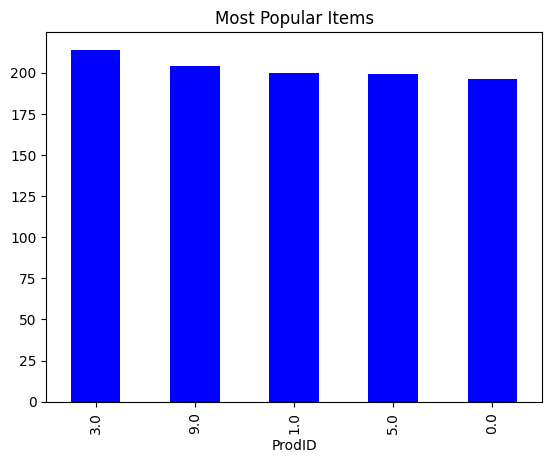

In [10]:
# Most Popular Items
popular_items = train_data['ProdID'].value_counts().head(5)
popular_items.plot(kind='bar',color='blue')
plt.title("Most Popular Items")

<Axes: xlabel='Rating'>

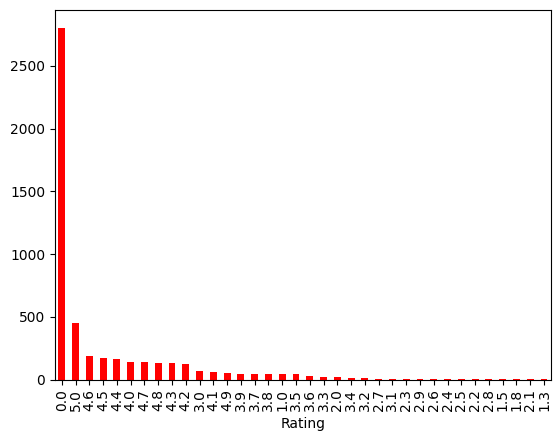

In [11]:
# Most Rated Products
train_data['Rating'].value_counts().plot(kind='bar', color='red')